<a href="https://colab.research.google.com/github/tanmy-sharma/ClassificationML/blob/main/SurgeryDataML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from matplotlib import rcParams

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier

**Reading Dataset**

In [ ]:
df = pd.read_csv("/content/Surgical-deepnet.csv")
df.head()

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,...,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,...,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0,0,0,...,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,0,1,0,0,1,1,0,...,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,59.0,1,0,0,0,0,0,0,0,...,0.00,0,0,7.88,11,0,0,0.00,1,0


# EDA

**Checking for null values**

In [ ]:
df.isna().sum()

bmi                    0
Age                    0
asa_status             0
baseline_cancer        0
baseline_charlson      0
baseline_cvd           0
baseline_dementia      0
baseline_diabetes      0
baseline_digestive     0
baseline_osteoart      0
baseline_psych         0
baseline_pulmonary     0
ahrq_ccs               0
ccsComplicationRate    0
ccsMort30Rate          0
complication_rsi       0
dow                    0
gender                 0
hour                   0
month                  0
moonphase              0
mort30                 0
mortality_rsi          0
race                   0
complication           0
dtype: int64

**No missing values**

**Checking if the dataset is balanced or not**

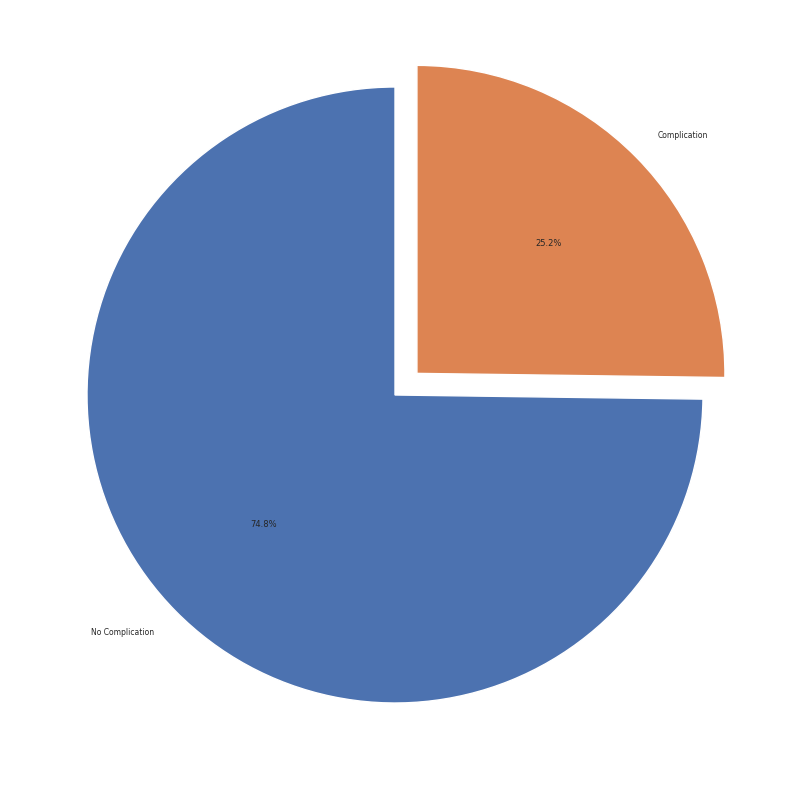

In [236]:
plt.figure(figsize = (10, 10))
plt.pie(df['complication'].value_counts(), explode=(0, 0.1), labels=("No Complication", "Complication"), autopct='%1.1f%%',
     startangle=90)
plt.show()

**Dataset is balanced**

In [ ]:
df.describe()

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
count,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,...,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000
mean,31.295642,63.205268,0.632320,0.262316,0.977520,0.620294,0.004851,0.120875,0.189546,0.342740,...,-0.699044,1.606970,0.548890,10.171613,5.915408,1.187086,0.003963,-0.836712,0.919440,0.252135
std,8.152709,18.088191,0.539952,0.439909,1.758355,0.485330,0.069485,0.325993,0.391955,0.474642,...,1.339394,1.497738,0.497621,2.659881,3.239825,1.158357,0.062830,1.194111,0.364663,0.434253
min,2.150000,6.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-4.720000,0.000000,0.000000,6.070000,0.000000,0.000000,0.000000,-3.820000,0.000000,0.000000
25%,26.510000,51.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.970000,0.000000,0.000000,7.820000,3.000000,0.000000,0.000000,-2.250000,1.000000,0.000000
50%,28.980000,59.700000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,-0.580000,1.000000,1.000000,9.120000,7.000000,1.000000,0.000000,-0.640000,1.000000,0.000000
75%,35.295000,74.700000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,3.000000,1.000000,12.050000,8.000000,2.000000,0.000000,0.000000,1.000000,1.000000
max,92.590000,90.000000,2.000000,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,12.560000,4.000000,1.000000,18.920000,11.000000,3.000000,1.000000,4.400000,2.000000,1.000000


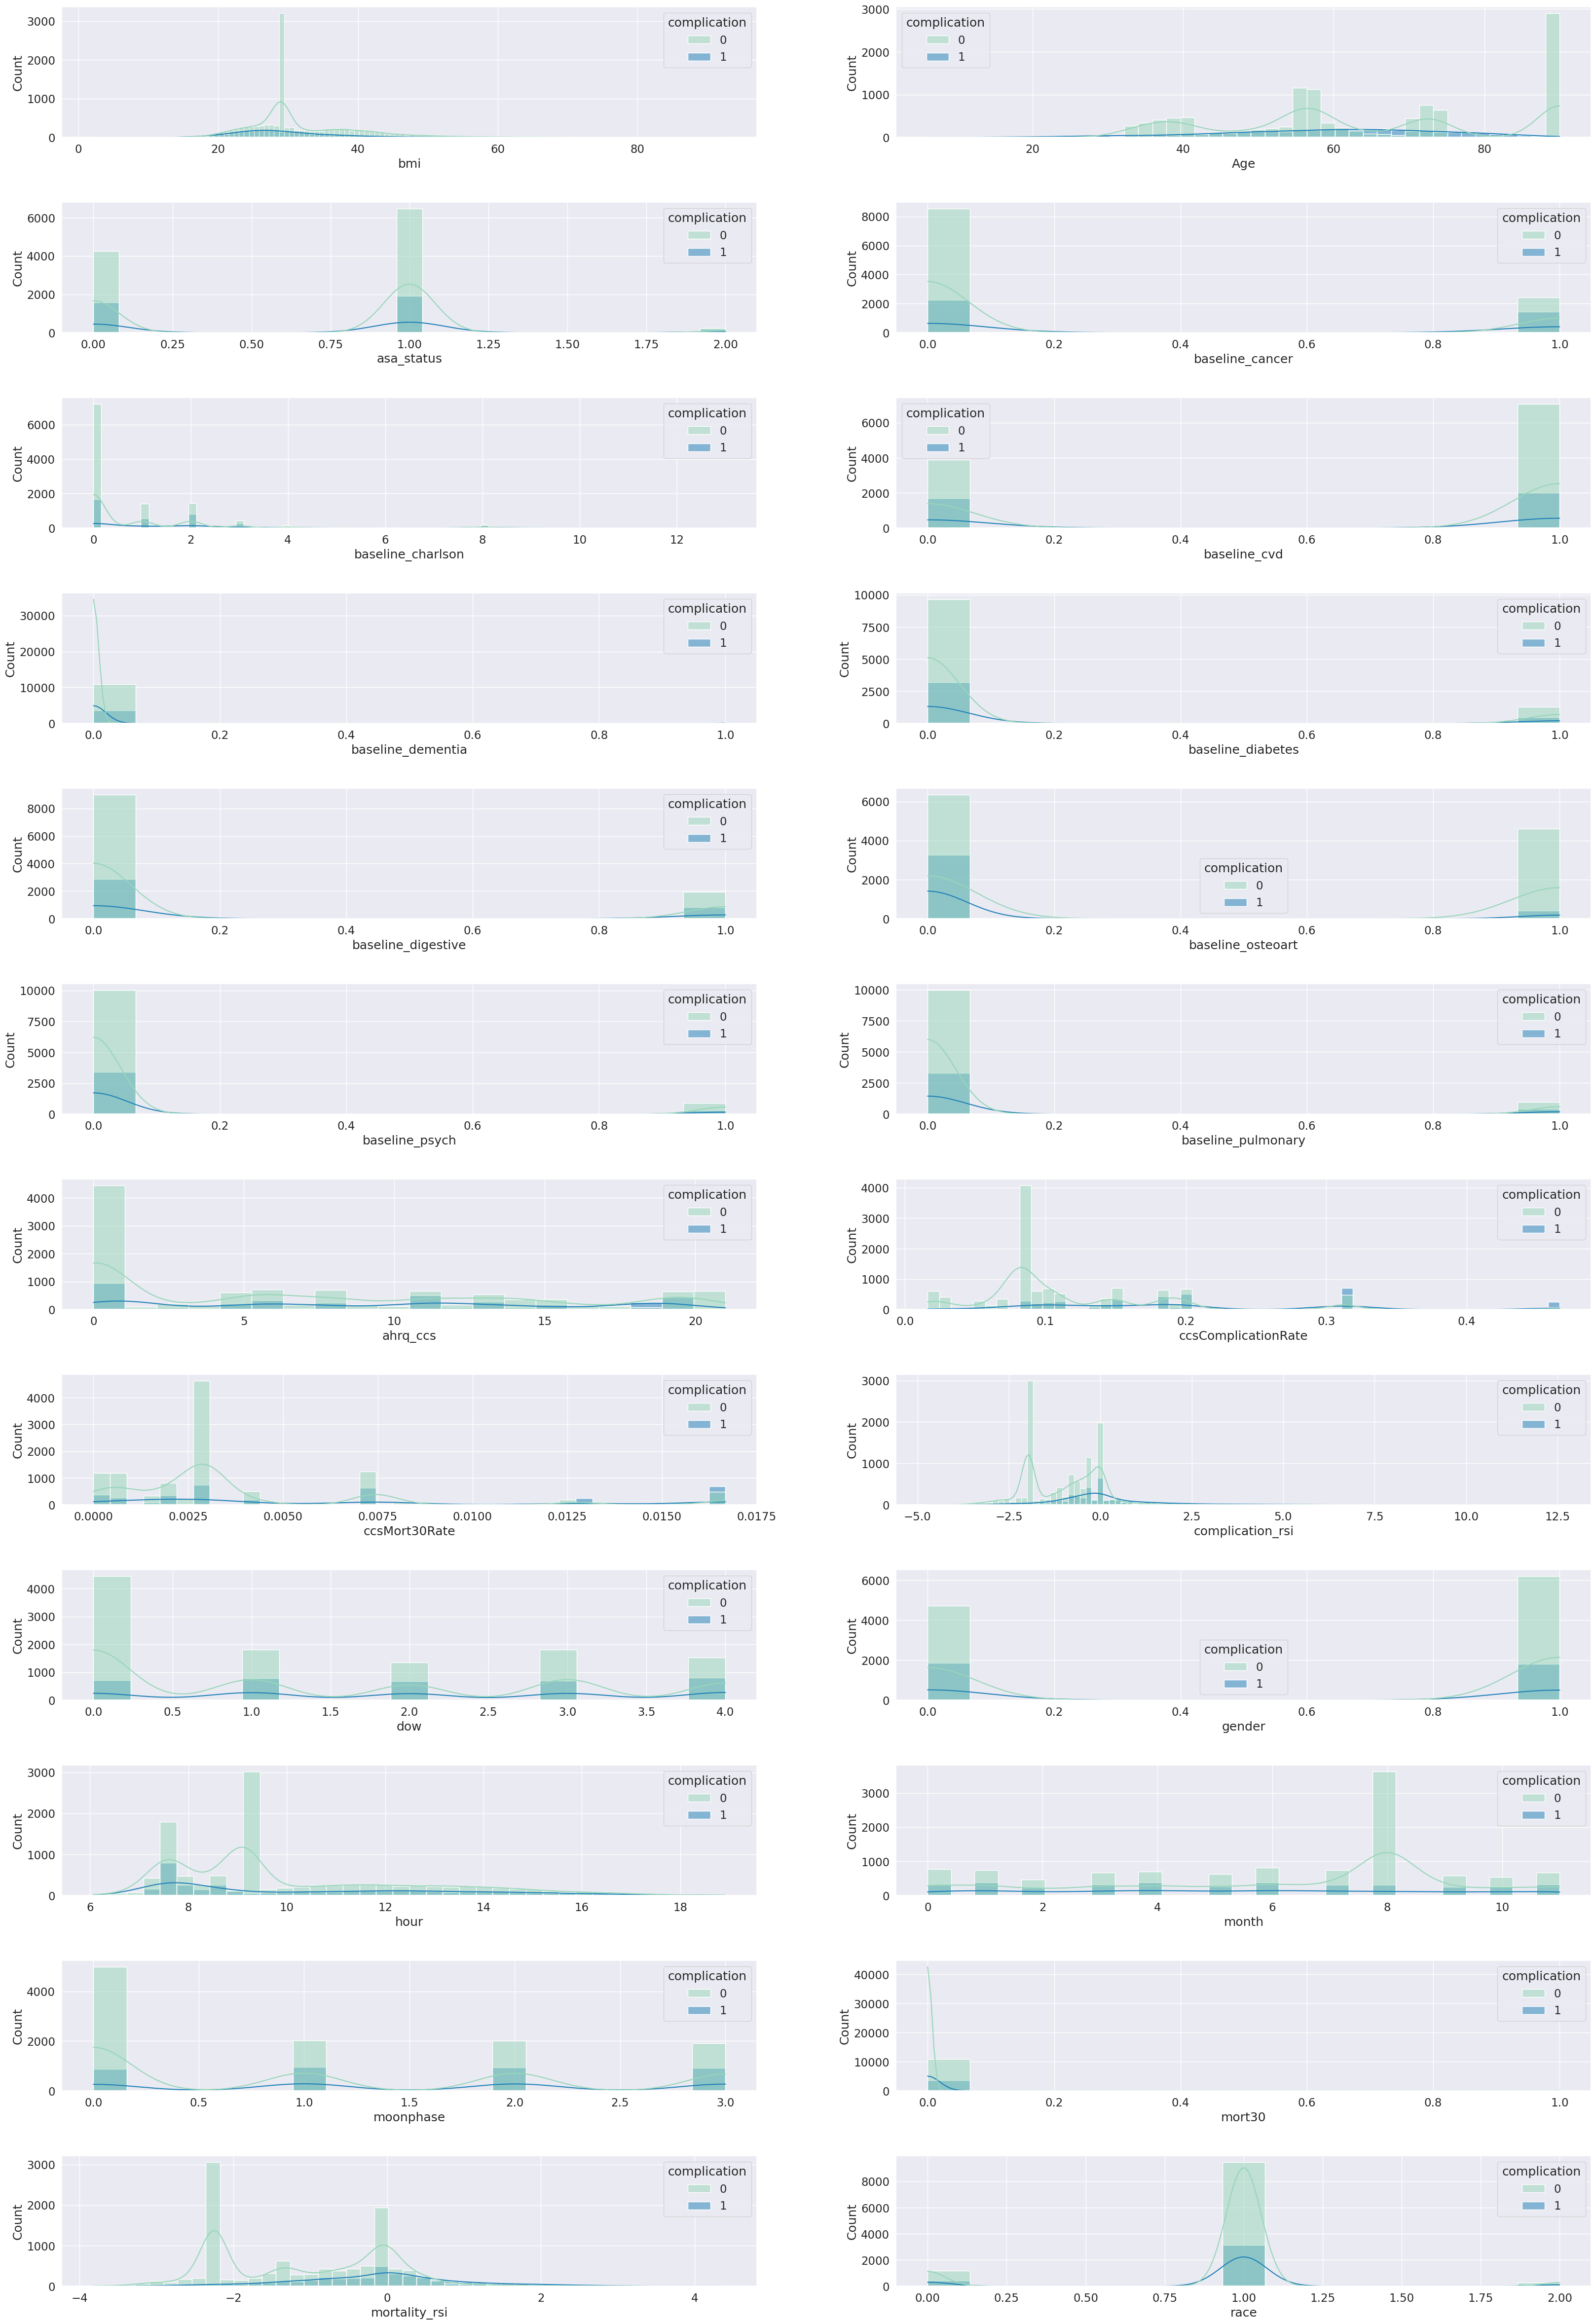

In [ ]:
columns_to_plot = [column for column in df.columns if column != 'complication']

rcParams['figure.figsize'] = 40,60
sns.set(font_scale = 3)
sns.set_style("white")
sns.set_palette("bright")
sns.set(font_scale = 1.5)
plt.subplots_adjust(hspace=0.5)
i = 1;
for columns in columns_to_plot:
    plt.subplot(12,2,i)
    sns.histplot(data=df, x=columns, hue="complication",kde=True,palette="YlGnBu")
    i = i + 1

**Data seems to be quite uniform in its own way. Let's check the correlation plot.**

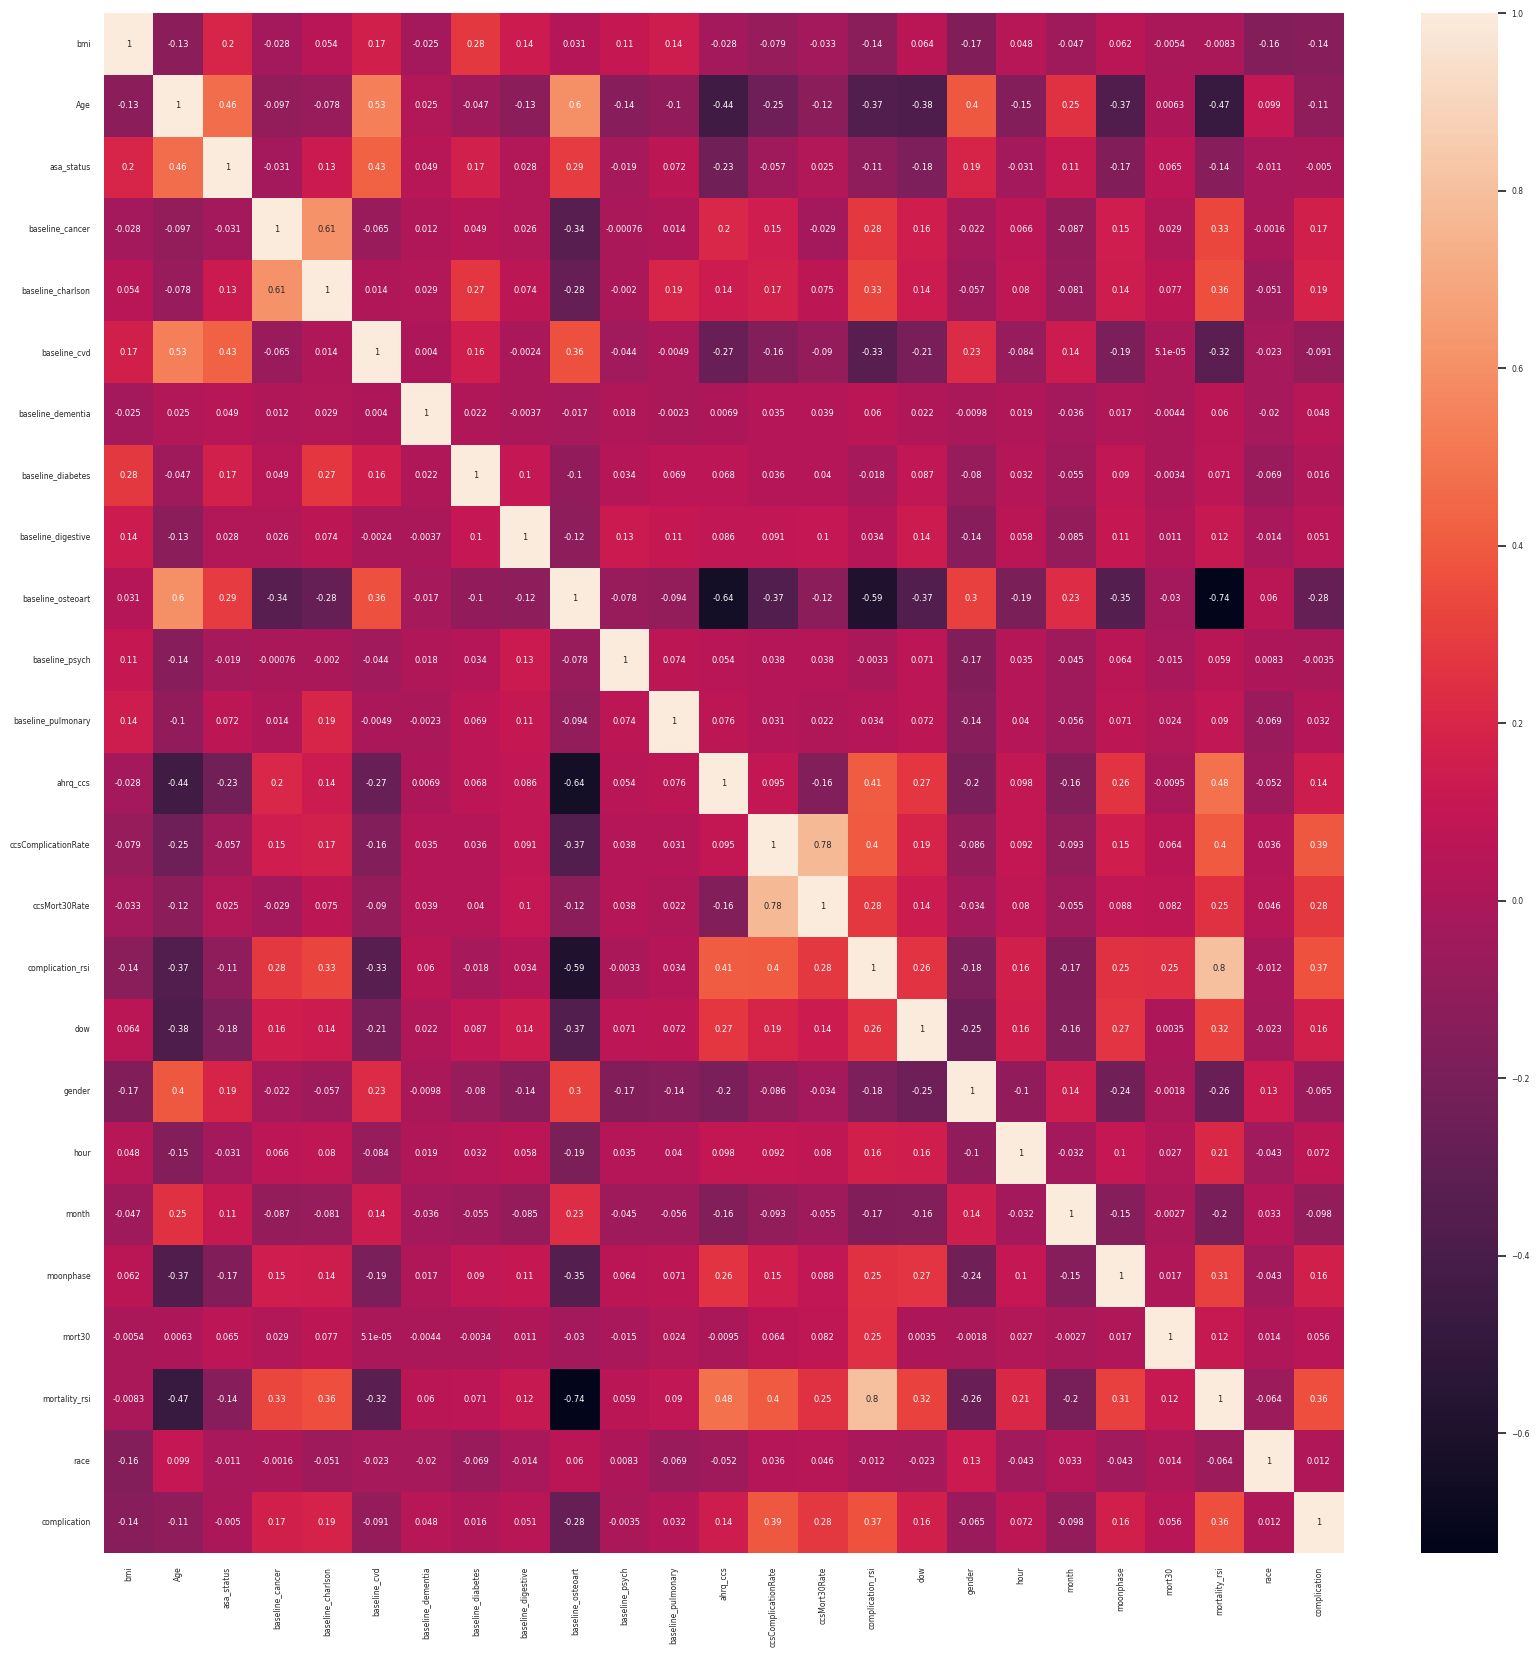

In [ ]:
plt.figure(figsize = (20, 20))
sns.set(font_scale = 0.5)
sns.heatmap(df.corr(), annot = True)
plt.show()

**We have some data of good relation. But since this is medical data, I cannot remove anything and mix anything as I do not know about the data. But we can say that almost complication causing symtoms seem to be ccsComplicationRate and complication_rsi. We will use models that can assign different priorities to different features like decision trees.**

**Outlier Checking**

bmi                       Axes(0.125,0.814746;0.227941x0.0652542)
Age                    Axes(0.398529,0.814746;0.227941x0.0652542)
asa_status             Axes(0.672059,0.814746;0.227941x0.0652542)
baseline_cancer           Axes(0.125,0.736441;0.227941x0.0652542)
baseline_charlson      Axes(0.398529,0.736441;0.227941x0.0652542)
baseline_cvd           Axes(0.672059,0.736441;0.227941x0.0652542)
baseline_dementia         Axes(0.125,0.658136;0.227941x0.0652542)
baseline_diabetes      Axes(0.398529,0.658136;0.227941x0.0652542)
baseline_digestive     Axes(0.672059,0.658136;0.227941x0.0652542)
baseline_osteoart         Axes(0.125,0.579831;0.227941x0.0652542)
baseline_psych         Axes(0.398529,0.579831;0.227941x0.0652542)
baseline_pulmonary     Axes(0.672059,0.579831;0.227941x0.0652542)
ahrq_ccs                  Axes(0.125,0.501525;0.227941x0.0652542)
ccsComplicationRate    Axes(0.398529,0.501525;0.227941x0.0652542)
ccsMort30Rate          Axes(0.672059,0.501525;0.227941x0.0652542)
complicati

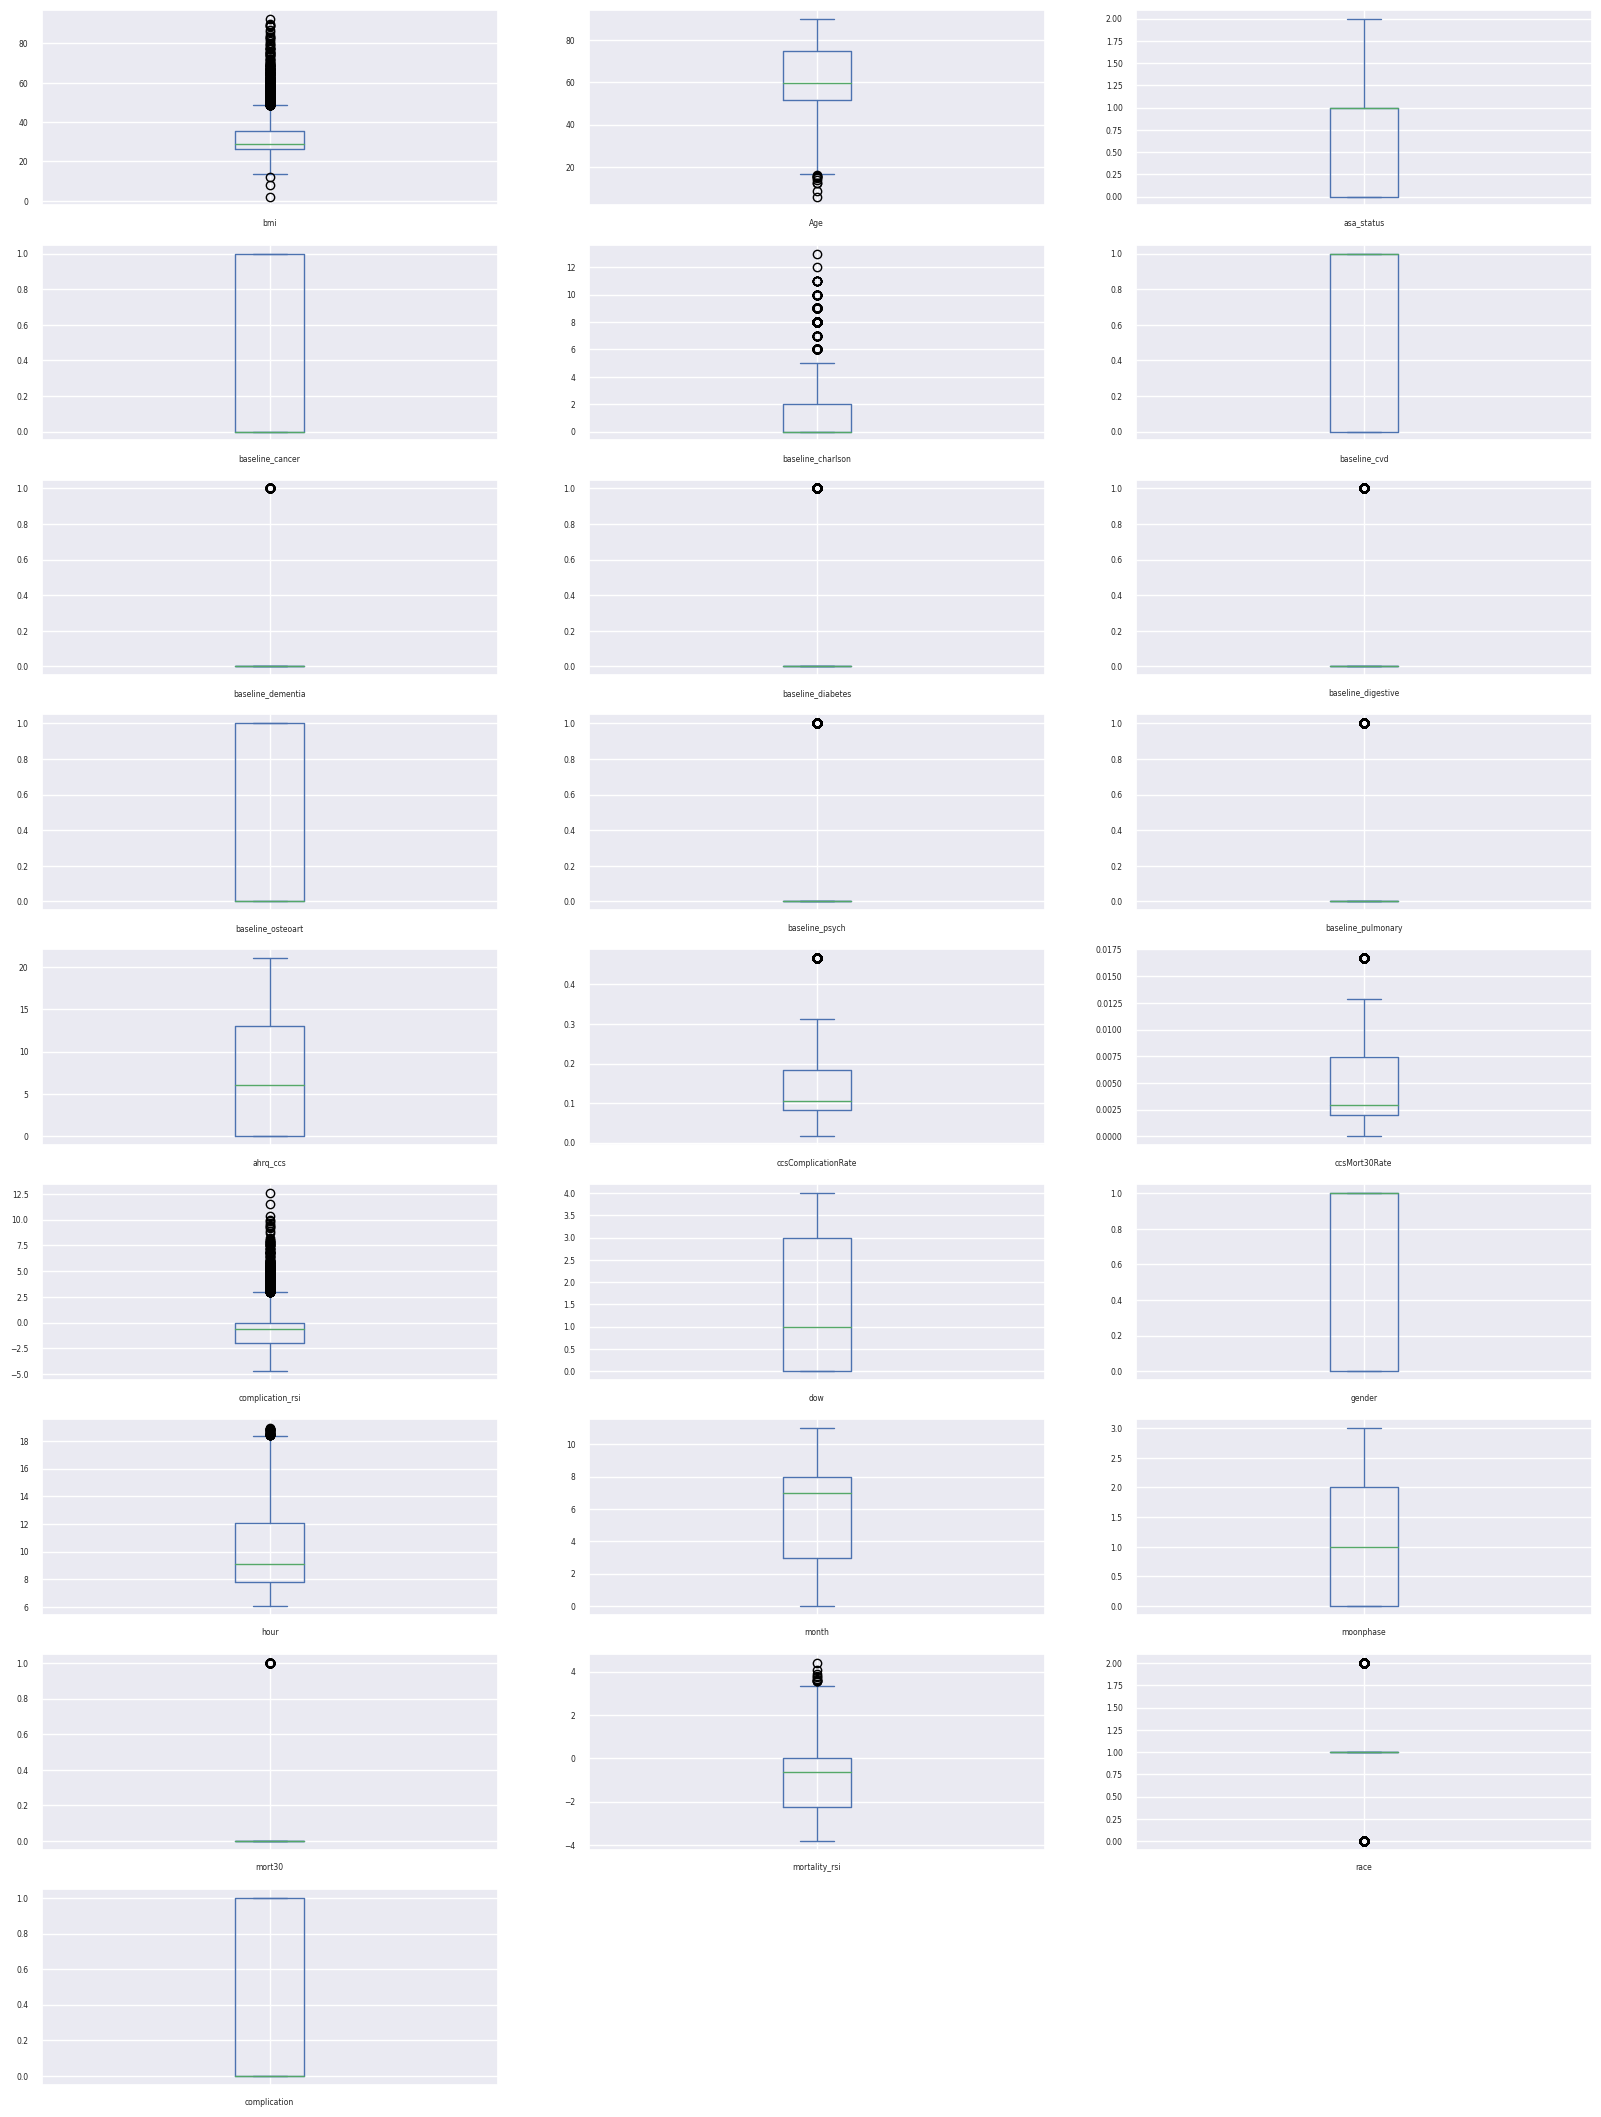

In [ ]:
df.plot(kind= 'box' , subplots=True, layout=(10, 3), sharex=False, sharey=False, figsize=(20,30))

We see that in the class complication_rsi, we have a number of outliers. Now, we will extract those outliers to obeserve what are the number of complications they give. Since the required class is highly related to complications, it may be possible these outliers are the reasons of complications. Let's check that for sure.

In [ ]:
Q1 = df['complication_rsi'].quantile(0.25)
Q3 = df['complication_rsi'].quantile(0.9)
IQR = Q3 - Q1
upper_whisker = Q3 + 1.5*IQR
outliers = df[(df['complication_rsi'] > upper_whisker)]
df['complication_rsi_outlier'] = df['complication_rsi'].isin(outliers['complication_rsi'])

In [ ]:
value_counts = df[df['complication_rsi_outlier'] == 0]['complication'].value_counts()
print(value_counts)

0    10915
1     3562
Name: complication, dtype: int64


In [ ]:
df['complication_rsi_outlier'].isna().sum()

0

In [ ]:
df['complication_rsi_outlier'].corr(df['complication'])

0.13424197624130804

In [ ]:
df['complication_rsi'].corr(df['complication'])

0.37383419179534816

In [ ]:
df['complication_rsi_without_outlier'] = df['complication_rsi'] - df['complication_rsi_outlier']
df[df['complication_rsi_without_outlier'] == 0]['complication'].value_counts()

0    1834
1     526
Name: complication, dtype: int64

In [ ]:
df['complication_rsi_without_outlier'].isna().sum()

0

In [ ]:
df['complication_rsi_without_outlier'].corr(df['complication'])

0.37737114076603656

**We were able to successfully create a feature with high correaltion and so, we will try to do the same with other features with outliers and try to see the result.**

In [ ]:
Q1 = df['mortality_rsi'].quantile(0.25)
Q3 = df['mortality_rsi'].quantile(0.75)
IQR = Q3 - Q1
upper_whisker = Q3 + 1.5*IQR
outliers = df[(df['mortality_rsi'] > upper_whisker)]
df['mortality_rsi_outlier'] = df['mortality_rsi'].isin(outliers['mortality_rsi'])

In [ ]:
value_counts = df[df['mortality_rsi_outlier'] == 0]['complication'].value_counts()
print(value_counts)

0    10941
1     3684
Name: complication, dtype: int64


In [ ]:
df['mortality_rsi_outlier'].isna().sum()

0

In [ ]:
df['complication'].corr(df['mortality_rsi_outlier'])

0.020947591380115385

In [ ]:
df['complication'].corr(df['mortality_rsi'])

0.35608608396525465

In [ ]:
df['mortality_rsi_without_outlier'] = df['mortality_rsi'] - df['mortality_rsi_outlier']
df[df['mortality_rsi_without_outlier'] == 0]['complication'].value_counts()

0    1100
1     205
Name: complication, dtype: int64

In [ ]:
df['mortality_rsi_without_outlier'].corr(df['complication'])

0.3563322739594042

In [ ]:
df.drop(columns = ['mortality_rsi_outlier', 'complication_rsi_outlier'], axis = 1)

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication,complication_rsi_without_outlier,mortality_rsi_without_outlier
0,19.31,59.2,1,1,0,0,0,0,0,0,...,0,7.63,6,1,0,-0.43,1,0,-0.57,-0.43
1,18.73,59.1,0,0,0,0,0,0,0,0,...,0,12.93,0,1,0,-0.41,1,0,0.21,-0.41
2,21.85,59.0,0,0,0,0,0,0,0,0,...,0,7.68,5,3,0,0.08,1,0,0.00,0.08
3,18.49,59.0,1,0,1,0,0,1,1,0,...,1,7.58,4,3,0,-0.32,1,0,-0.65,-0.32
4,19.70,59.0,1,0,0,0,0,0,0,0,...,0,7.88,11,0,0,0.00,1,0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14630,18.79,14.1,1,0,1,0,0,0,0,0,...,0,7.78,0,1,0,-0.16,1,1,-0.54,-0.16
14631,19.65,12.6,0,0,0,0,0,0,0,0,...,0,8.40,6,1,0,-0.77,1,1,-1.42,-0.77
14632,14.84,12.6,1,0,0,0,0,0,0,0,...,0,13.25,3,3,0,0.99,1,1,0.65,0.99
14633,17.75,8.9,0,0,1,0,0,0,1,0,...,1,8.30,5,0,0,0.17,1,1,-0.50,0.17


**We got minimal but good change. Anything more drastic cannot be done due to the lack of knowledge about the medical terms. So, we are going to leave now and train some models after splitting the data.**

# Splitting the data

In [ ]:
x = df.drop(columns = 'complication', axis = 1)
y = df['complication']

In [ ]:
x = RobustScaler().fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, stratify = y, test_size = 0.25)

# Model Training

In [ ]:
dict_accuracy = {}
dict_f1 = {}

**Decision Trees**

In [ ]:
model_DT = DecisionTreeClassifier()
DT_fit = model_DT.fit(x_train, y_train)
DT_predict = DT_fit.predict(x_test)

In [ ]:
dict_accuracy['DT'] = accuracy_score(y_test, DT_predict)
dict_f1['DT'] = f1_score(y_test, DT_predict)

print("Accuracy :", dict_accuracy['DT'])
print("F1 Score :", dict_f1['DT'])

Accuracy : 0.8472260180377152
F1 Score : 0.7068694284216046


**Random Forest Classifier**

In [ ]:
model_RF = RandomForestClassifier()
RF_fit = model_RF.fit(x_train, y_train)
RF_predict = RF_fit.predict(x_test)

In [ ]:
dict_accuracy['RF'] = accuracy_score(y_test, RF_predict)
dict_f1['RF'] = f1_score(y_test, RF_predict)

print("Accuracy :", dict_accuracy['RF'])
print("F1 Score :", dict_f1['RF'])

Accuracy : 0.8781087728887674
F1 Score : 0.7229813664596274


**Ada Boost Classifier**

In [ ]:
model_ABC = AdaBoostClassifier()
ABC_fit = model_ABC.fit(x_train, y_train)
ABC_predict = ABC_fit.predict(x_test)

In [ ]:
dict_accuracy['ABC'] = accuracy_score(y_test, ABC_predict)
dict_f1['ABC'] = f1_score(y_test, ABC_predict)

print("Accuracy :", dict_accuracy['ABC'])
print("F1 Score:", dict_f1['ABC'])

Accuracy : 0.889587318939601
F1 Score: 0.7515375153751537


**XGBClassifier**

In [ ]:
model_XGB = XGBClassifier()
XGB_fit = model_XGB.fit(x_train, y_train)
XGB_predict = XGB_fit.predict(x_test)

In [ ]:
dict_accuracy['XGB'] = accuracy_score(y_test, XGB_predict)
dict_f1['XGB'] = f1_score(y_test, XGB_predict)

print("Accuracy :", dict_accuracy['XGB'])
print("F1 Score :", dict_f1['XGB'])

Accuracy : 0.9084449303088276
F1 Score : 0.797583081570997
